# Stochastic Gradient Descent

The dot products in the algorithm have some __important costs__. If we had 1 million points with 100 thousand features? We would have a $10^6 \times 10^5$ matrix which will take some time.

So the question becomes: do we really need to compute the entire dataset to compute the gradient of the error? If we try to undersample the samples in the in-sample error we would have a _fuzzier_ vector but its gradient direction should be the same. This is the basic principle behind the GSD.

We call it _stochastic_ because we randomly sample a number $n$ of points, or in extreme cases sample 1 random point out of the dataset. Even if it seems crazy, this approach is more efficient than calculating the total gradient descent (and it is been proved!).

This approach is __computationally manageable__ and it will work better. We can escape the saddle points (or the local minums) because we move in a more random way than the actual descent. In a way, we implicitly choose to add some noise when we try to find the absolute minimum in the error function.

## Data generation

As for the Adaline Learning Algorithm, also in this case we suggest reading the initial setup explanation in the initial setup [PLA-improved notebook](https://github.com/imAlessas/neural-networks/blob/main/algorithms/perceptron/PLA-improved.ipynb) where everything is properly clarified. 

[-0.65616464 -0.61609791  0.15105724]
Norm of w: 0.9126592835179715


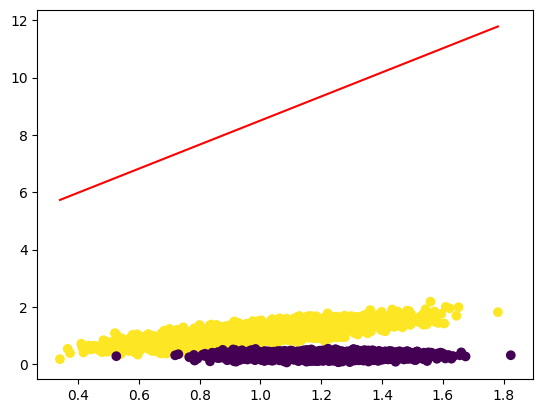

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(22)

# generate N points per class
N = 5000

# first components of X1 and X2
X1_1 = 2 * np.random.normal(loc=0.5, scale=0.1, size=N)
X2_1 = X1_1 + np.random.normal(loc = 0, scale = 0.15, size=N) + 0.1

# generate labels
Y1 = np.ones(N)

# second components of X1 and X2
X1_2 = 2 * np.random.normal(loc=0.6, scale=0.07, size=N)
X2_2 = np.random.normal(loc=0.6, scale=0.07, size=N) - 0.3 #X1 * 2 + np.random.normal(loc = 0, scale = 0.1, size=N)

# generate labels
Y2 = -np.ones(N)

# plots the components
# plt.scatter(X1_1, X2_1)
# plt.scatter(X1_2, X2_2)

# generates weight vector w_0,....,w_n
w = np.random.uniform(low=-1,size=3)
#w = w / np.linalg.norm(w)

print(w)
print("Norm of w: " + str(np.linalg.norm(w)))

# Plots the hyperplane
plt.plot([np.min(X1_1), np.max(X1_1)],
        [np.min(X1_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1_2) * (-w[1]/w[2]) - w[0]/w[2]],
        color = 'red')


# generate coordinate X0
X0 = np.ones(N * 2)
#X0 = X0[:, np.newaxis]

#  creates the final set of point X1 and X2
X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))

X = np.stack((X0, X1, X2), axis=1)

y = np.concatenate((Y1, Y2))

#X = np.hstack((X0, np.vstack((X1, X2))))
plt.scatter(X[:, 1], X[:, 2], c=y)

# y.shape[0]

### Error function

In this case, the error function is the mathematical definition of the _Sum Squared Error_ which translates into the following mathematical summation:

$$
    \frac{1}{2}\sum_{i = 1}^N(\text{e}_i)^2
$$

In [2]:
def error_sse(errors):
    error = np.sum(np.square(errors)) / 2
    return error

## Training stage

_Need to update the python algorithm because it is incorrect_

This approach is called __mini-batch learning: we use small data from the dataset to update the weights. This approach stands in the middle between _batch learning_ and _single point_ updates. The first one is when the dataset is used to calculate the direction of the gradient meanwhile the second approach uses a random point in the dataset to choose the direction of the gradient. This kind of unpredictability lets the algorithm 'jump' from one point to another improving the success rate to escape a saddle point or, in general, a local minimum.

In the algorithm, we shuffle object and we generate a random permutation of the indexes of the $n$ points. How to subsample a mini-batch of point of matrix $x$: we generate a random index and we access the matrixes. We get the first 

[ 0.19942727 -1.41851119  1.93585816]
# of epochs =  50


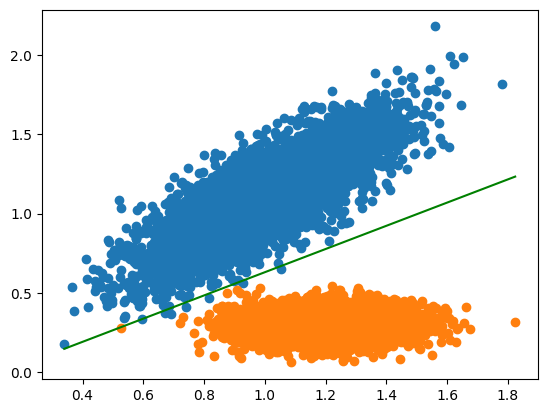

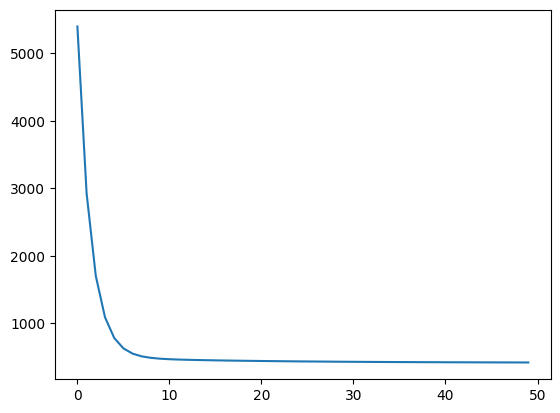

In [3]:
#np.random.seed(43)

# generate w_0,....,w_n
w = np.random.uniform(low=-0.1, high=0.1, size=3)
#w = np.zeros(3)

# set learning rate 0 < eta < 1
eta = 0.0001

# check epochs
epochs = 0

# set maximum epochs
max_epochs = 50

# track total error per epoch
total_error = np.zeros(max_epochs)

while (epochs < max_epochs):
    
    #w = w / np.linalg.norm(w)
    
    # compute current output
    adaline_output = np.dot(X, w)
    
    # compute error for each data point
    errors = y - adaline_output
    
    # compute SSE error at this epoch
    total_error[epochs] = error_sse(errors)
    
    #print(total_error[epochs])
    
    # check if a solution is found
    # print(adaline_output)
    if all(adaline_output * y > 0):
        break
    else:
        
        # shuffle objects
        rand_perm = np.random.permutation(range(y.shape[0]))
    
        # apply permutation and update weights
        for xi, yi in zip(X[rand_perm, :], y[rand_perm]):
            
            error = (yi - np.dot(xi, w))
            
            # update with w = w + delta_w
            delta_w = eta * 2 * xi * error
            w = w + delta_w
    
    epochs += 1
    
print(w)

# plots the points
plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

#print(eta)
print("# of epochs = ", epochs)

# plots the hyperplane
plt.plot([np.min(X1), np.max(X1)],
         [np.min(X1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]],
         color = 'green')

plt.figure()

# epochs - error plot
plt.plot(range(max_epochs), total_error)

As we can see from the plots, this approach is way more efficient than the naive Adaline non-stochastic approach. To make such a conclusion let's denote the values $\eta$ and <tt>max_epochs</tt> with $N = 5000$ for the 2 algorithms:

* __Naive__ Adaline: $\eta = 0.01$ and <tt>max_epochs</tt>$ = 2000$

* __Stochastic__ Adaline: $\eta = 0.0001$ and <tt>max_epochs</tt>$ = 50$

We can see that with way less epochs and a learning rate 100 times smaller the stochastic approach reaches a result very similar to the naive approach with the only difference that the algorithm is way more efficient.